<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Default snipped example, click on **<>** from left menu and select *Camera Capture*.

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
      async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


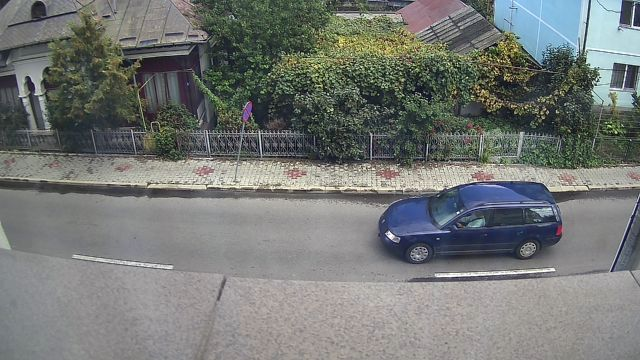

In [8]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors webcam or if permission to access it.
  print(str(err))

Show the content of the disk.

In [49]:
%cd content/
%ls

/content
photo.jpg  sample_data/


This source code show the image save on disk.

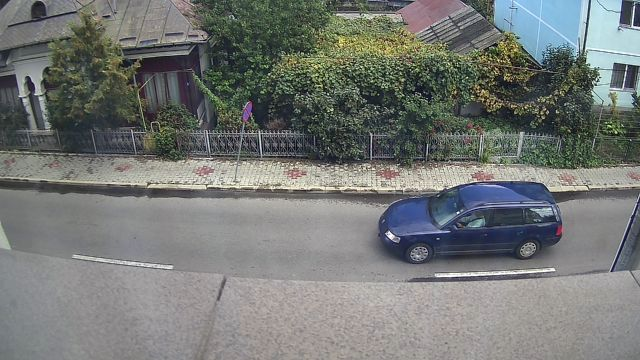

In [50]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

This is a simple webcam capture based from Camera Capture snipped.

In [80]:
def start_webcam():
  js = Javascript('''
    async function start_WebcamJavaScript() {

      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      try 
      {
        video.srcObject = stream;

      } catch (err) {
        if (err.name != "TypeError") 
        {
          throw err;
          video.src = URL.createObjectURL(stream);
        }
      }
      //... add your javascript source code 
      
      await video.play();
    }
    ''')
  
  display(js)
  data = eval_js('start_WebcamJavaScript()')
    
start_webcam()

<IPython.core.display.Javascript object>